In [ ]:
#All imports
import re
import unicodedata
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf drive/MyDrive/GEC/lang8.bea19.tar.gz

lang8.train.auto.bea19.m2
lang8_to_m2.py
readme.txt


In [ ]:
with open('lang8.train.auto.bea19.m2') as f: #lang8.train.auto.bea19.m2
  data = f.readlines()

In [ ]:
#No of lines in the data
print(len(data))

4015882


In [ ]:
#Reference: https://github.com/mridul1012/Grammatical-Error-Correction-with-Neural-Networks
#https://www.cl.cam.ac.uk/research/nl/bea2019st/data/corr_from_m2.py

# Apply the edits of a single annotator to generate the corrected sentences.
m2 = open('lang8.train.auto.bea19.m2').read().strip().split("\n\n")
out = open('corrected.txt', "w")
in_ = open('error.txt', "w")
# Do not apply edits with these error types
skip = {"noop", "UNK", "Um"}

for sent in tqdm(m2):
  #print(sent)
  sent = sent.split("\n")
  cor_sent = sent[0].split()[1:] # Ignore "S "

  in_.write(" ".join(sent[0].split()[1:])+"\n" )
  #print('ORIGINAL',sent[0].split()[1:])
  
  edits = sent[1:]
  offset = 0
  for edit in edits:
    edit = edit.split("|||")
    if edit[1] in skip: continue # Ignore certain edits
    coder = int(edit[-1])
    if coder != 0: continue # Ignore other coders
    span = edit[0].split()[1:] # Ignore "A "
    start = int(span[0])
    end = int(span[1])
    cor = edit[2].split()
    cor_sent[start+offset:end+offset] = cor
    offset = offset-(end-start)+len(cor)

  #print('CORRECT',cor_sent)
  out.write(" ".join(cor_sent)+"\n")

100%|██████████| 1037561/1037561 [00:08<00:00, 115383.58it/s]


In [ ]:
with open('corrected.txt') as f:
  correct_data = f.read()

with open('error.txt') as f:
  error_data = f.read()

In [ ]:
final_data = pd.DataFrame(columns = ['error', 'correct'])

final_data['correct'] = correct_data.split('\n')
final_data['error'] = error_data.split('\n')[:len(final_data['correct'])]

In [ ]:
final_data.describe()

,error,correct
count,1037481,1037481
unique,943888,937889
top,URL,URL
freq,2765,2762


- Thus we obtain 1037481 rows of train data, out of which 943888 are unique
- freq is the max frequency of a single entry

In [ ]:
pd.options.display.max_colwidth = 600
final_data[:50]

,error,correct
0,Good luck on your new start !,Good luck on your new start !
1,My teacher is going to move to change his job .,My teacher is going to move to change his job .
2,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was him .","Actually , he was the one who let me know about Lang - 8 . ."
5,He is also good at Japanese and studies ' Kanji ' .,He is also good at Japanese and studies ' Kanji ' .
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
7,"We 've known each other for only half a year , but his lesson was a lot of fun .","We 've known each other for only half a year , but his lessons were a lot of fun ."
8,I 'm going to miss him but I really wish him the best of luck with his new life .,I 'm going to miss him but I really wish him the best of luck with his new life .
9,I 'm looking forward to seeing him again through here .,I 'm looking forward to seeing him again through here .


In [ ]:
final_data[50:100]

,error,correct
50,"Well , I just proud of myself , yep .","Well , I just proud of myself , yep ."
51,: ),: )
52,"And , by the way , `` white nights `` have already come .","And , by the way , `` white nights `` have already come ."
53,And now they disturb me .,And now they disturb me .
54,If only I had black dense curtains .,If only I had dense black curtains .
55,Whitney Houston Failed,Whitney Houston Failed
56,"A couple of weeks ago , I heard a new Whitney Houston 's tune on my car radio .","A couple of weeks ago , I heard a new Whitney Houston tune / song on my car radio ."
57,It sounded not bad .,It sounded not bad .
58,I had been wondering what she was doing .,I had been wondering what she was / has been doing .
59,"And finally , she released a new song !","And finally , she released a new song !"


In [ ]:
final_data[100:150]

,error,correct
100,"Well , there remains to get it and check it out .","Well , I just have to get it and check it out ."
101,My mum is a great cook !,My mum is a great cook !
102,"Hi everyone ,","Hi everyone ,"
103,I just realised I am so lucky ! ! !,I just realised I am so lucky ! ! !
104,Why ?,Why ?
105,It 's because my mum is probably the best cook I have met in my life .,It 's because my mum is probably the best cook I have ever met in my life .
106,"Cooking is not her profession , she is a housewife .","Cooking is not her profession ; but rather , she is a housewife ."
107,I have ate at hotels and expensive meals but they are nothing like what she cooks .,I have eaten at hotels and have had expensive meals but they are nothing like what she cooks .
108,A friend once told me that the reason why I love her cooking is because she 's my mum but that is not the reason .,A friend once told me that the reason why I love her cooking is because she 's my mum but that is not the reason .
109,Being a housewife is really tough .,Being a housewife is really tough .


In [ ]:
final_data.to_csv("drive/MyDrive/GEC/raw_data.csv", index = False)

Load the saved raw data

In [ ]:
final_data = pd.read_csv("drive/MyDrive/GEC/raw_data.csv")

Remove duplicate rows from data

In [ ]:
final_data.describe()

,error,correct
count,1037480,1037479
unique,943887,937887
top,URL,URL
freq,2765,2762


In [ ]:
final_data = final_data.drop_duplicates()

In [ ]:
final_data.describe()

,error,correct
count,950673,950672
unique,943887,937887
top,Nice to meet you .,What do you think ?
freq,11,31


In [ ]:
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,950672,950672
unique,943886,937887
top,Nice to meet you .,What do you think ?
freq,11,31


Max length of sentences

In [ ]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

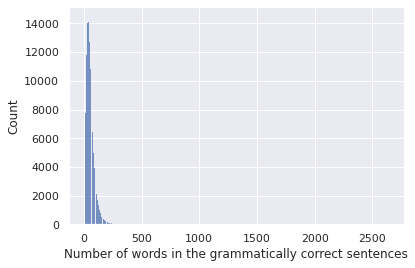

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

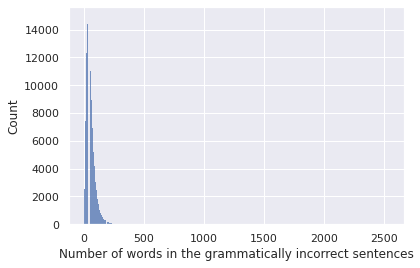

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_1,i))

1.0
20.0
28.0
35.0
41.0
48.0
56.0
66.0
79.0
101.0


In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_2,i))

1.0
19.0
27.0
34.0
40.0
47.0
55.0
64.0
77.0
100.0


Remove sentences that:
- have less than equal to 5 words
- have more than or equal to 30 words
- have the same error sentence and correct sentence 

In [ ]:
for i, row in enumerate(final_data['error']):
  #print(i, row)
  if row.split(" ") == final_data['correct'].iloc[i].split(" ") or len(row.split(" ")) >= 15 or len(row.split(" ")) <= 5:
    final_data.iloc[i] = np.nan

In [ ]:
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,290242,290242
unique,289535,288179
top,I start Lang - 8 today .,This is my first diary entry .
freq,5,20


In [ ]:
final_data

,error,correct
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou..."
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...
15,"When you go uphill , you hvae to bend your back .","When you go uphill , you have to bend your back ."
...,...,...
1037467,I could change my feeling .,I could feel the change / difference !
1037471,The following is more detailed video clip by A...,The following is a more detailed video clip by...
1037474,"Recently , I have a question whether people ca...","Recently , I had a question whether people can..."
1037477,Some really want to change their aggresive per...,Some really want to change their aggressive pe...


Check for missing values

In [ ]:
final_data.isna().any()

error      False
correct    False
dtype: bool

Basic preprocessing : 
- Decontractions like do n't, I 'm,  
- Handle : D, x D etc
- Remove brackets, remove text within it : "And I think it 's fun , right ?"	"And I think it 's fun , right ? ( YEAH ! )"

Note: There is noise in the data and use of speacial characters.

ALSO BIG NOTE:
- Remove missing, duplicate values.
- Experiment w keeping same sentences (corr/incorrect)
- SHAP figures AI explanability, explore!!
- Can something be done abput the noise in the dataset

Basic Preprocessing

In [ ]:
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"gon na", " going to", phrase)
    phrase = re.sub(r"wan na", " want to", phrase)
    phrase = re.sub(r"gonna", " going to", phrase)
    phrase = re.sub(r"wanna", " want to", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub("\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
        
    return phrase

def clean_text(t):

  #print(t)

  t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('ascii') #No need to normalize as text is already an <str> with utf-8 character set
  t = decontracted(t)

  t = re.sub(r'x D', '', t)
  t = re.sub(r': D', '', t)
  t = re.sub(r': P', '', t)

  t = re.sub(r'xD', '', t)
  t = re.sub(r':D', '', t)
  t = re.sub(r':P', '', t)

  #If brackets in text, remove text within brackets
  if '(' in t and ')' in t:
    try:
      t = re.sub(t.split("(")[-1].split(")")[0], '', t)
    except:
      pass
    #t = re.sub("(", '', t)
    #t = re.sub(")", '', t)
  
  #Replace all characters except these with space
  t = re.sub(r'[^A-Za-z;!?.,\-\' ]+', ' ', t)

  #If semicolon in text, remove the part after semicolon till fullstop (since we don't know if the text after semicolon is a continuation of the sentence or a new context altogether)
  #if ';' in t:
  #  t = re.sub(';', ' , ', t)

  t = re.sub(r'\.+',r' .',t)
  t = re.sub(r'\;+',r' , ',t)
  t = re.sub(r'!+',r' !',t )
  t = re.sub(r'\?+',r' ?',t )
  t = re.sub(r'\-+',r' - ',t )
  t = re.sub(r'\,+',r' , ',t )
  t = re.sub(r'\'+',r" ' ",t)
  t = re.sub(' +', ' ', t)

  return t

In [ ]:
final_data['correct'] = final_data['correct'].apply(clean_text)
final_data['error'] = final_data['error'].apply(clean_text)

In [ ]:
final_data[:50]

,error,correct
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - was him .","Actually , he was the one who let me know abou..."
6,His Kanji is ability is much better than me .,His Kanji ability is much better than mine .
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...
15,"When you go uphill , you hvae to bend your back .","When you go uphill , you have to bend your back ."
17,"When you are go smoothly , you have to be more...","When everything is going smoothly , you have t..."
23,The making souvenir is a hard and interesting ...,Making souvenirs is a hard but interesting work .
36,"You know , you can take them at slot machine .","You know , you can ? them at a slot machine ."
38,The third memory is the house we lived .,The third memory is the house where we lived .
44,I liked the winter Finland .,I liked Finland in the Winter .


In [ ]:
final_data[50:100]

,error,correct
199,I am listening to music with the commuter train .,I am listening to music on the commuter train .
200,"Today , I listen the music , it looks like in ...","Today , I listen the music , it feels like I a..."
209,Spring is very exciting season .,Spring is a very exciting season .
211,"Japanese school , work starts spring .","In Japan , the new school and work year starts..."
212,I hope to get any quarifications in english .,I hope to become qualified in English .
213,I hope to get my new promotions .,I hope to get a new promotion .
215,Everyday starts new thinngs to try .,"Everyday , there are new things to try ."
221,". . . No , extremely sometimes .",". . . No , very frequently ."
222,"Since today , I am going to try write a diary ! !","Starting today , I am going to try write a dia..."
223,Today is nothing specal to write ! !,Today has nothing specal to write ! !


In [ ]:
final_data[100:150]

,error,correct
357,Do I have to get along with it all my life ?,Do I have to live with it for the rest of my l...
369,I have sum up some points which I think import...,I have summed up some points which I think are...
374,A good review is the best start point .,A good review is the best starting point .
377,The balance of width and depth of your reading...,The correct balance of width and depth of your...
378,Both way have its merits and disadvantages .,Both ways have their merits and disadvantages .
403,I think that Manga is the great entertainment ...,I think that Manga is the greatest form of ent...
406,,
407,It is a new experience and very educational of...,It is a new experience and very educational fo...
411,I realized that I am that kind of people who a...,I realized that I am the kind of person who is...
414,"For instance , I started watching Indian movie...","For instance , I started watching some Indian ..."


In [ ]:
final_data.describe()

,error,correct
count,290242,290242
unique,288725,286981
top,,
freq,544,578


In [ ]:
final_data = final_data.drop_duplicates()
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,289572,289572
unique,288725,286981
top,,
freq,32,70


In [ ]:
final_data.to_csv('drive/MyDrive/GEC/preprocessed_15.csv', index = False)

Load data from disk and check for missing values

In [ ]:
final_data = pd.read_csv('drive/MyDrive/GEC/preprocessed_15.csv')

In [ ]:
for i, row in enumerate(final_data['error']):
  if row.split(" ") == final_data['correct'].iloc[i].split(" "):
    final_data.iloc[i] = np.nan

In [ ]:
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,288041,288041
unique,287212,285491
top,,
freq,31,69


In [ ]:
final_data.to_csv('drive/MyDrive/GEC/final_preprocessed_15.csv', index = False)

EDA:
- Plot word clouds for both input and output sets
- Analysis of the lengths of inputs and outputs

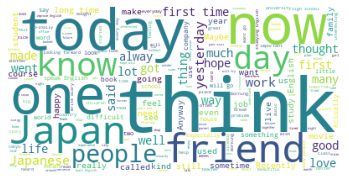

In [ ]:
#Plot word cloud: https://www.datasciencelearner.com/how-to-create-a-wordcloud-display/#:~:text=You%20can%20use%20any%20python%20visualization%20packages%20for,you%20are%20importing%20the%20matplotlib%20packages%20as%20plt.
text = " ".join(final_data['correct'])

WC = WordCloud(background_color="white").generate(text)

plt.imshow(WC)
plt.axis("off")
plt.show()

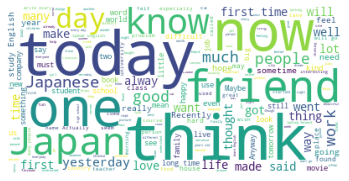

In [ ]:
text = " ".join(final_data['error'])

WC = WordCloud(background_color="white").generate(text)

plt.imshow(WC)
plt.axis("off")
plt.show()

In [ ]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_1,i))

In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_2,i))